In [1]:
import pandas as pd 
import numpy as np
from sklearn import impute
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input1 = pd.read_csv("clev.data")#loading cleveland data
input2 = pd.read_csv("hun.data")#loading hungarian data
input3 = pd.read_csv("sz.data") # loading swiz data

In [3]:
#printing the shape of the datasets loaded.
print("the shape of input 1 is ",input1.shape)
print("the shape of input 2 is ",input2.shape)
print("the shape of input 3 is ",input3.shape)

the shape of input 1 is  (302, 14)
the shape of input 2 is  (293, 14)
the shape of input 3 is  (122, 14)


From the above shape we can understand that there are total of 14 features available in each of the datasets. Therefore, i will first combine  these dataset together and do the visualization of data for future use.

In [4]:
#adding the column names to each of the dataset
input1.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca',
                  'thal','target']
input2.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca',
                  'thal','target']
input3.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca',
                  'thal','target']

In [5]:
#after adding columns names, i will be concatenating the dataframes to make it one for easy visualization and preprocessing.
concatenation = [input1,input2,input3]
total_df = pd.concat(concatenation)

In [6]:
#printing the shape of concatenated DF
print("The shape of concatenated DF is ", total_df.shape)

The shape of concatenated DF is  (717, 14)


In [7]:
#Printing the first 5 rows and last 5 rows for high level visualization.
print(total_df.head(5))
print(total_df.tail(5))

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
1  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
2  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
3  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   
4  56.0  1.0  2.0      120  236   0       0     178     0     0.8     1  0.0   

  thal  target  
0  3.0       2  
1  7.0       1  
2  3.0       0  
3  3.0       0  
4  3.0       0  
      age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope ca  \
117  70.0  1.0  4.0      115    0   0       1      92     1       0     2  ?   
118  70.0  1.0  4.0      140    0   1       0     157     1       2     2  ?   
119  72.0  1.0  3.0      160    0   ?       2     114     0     1.6     2  2   
120  73.0  0.0  3.0      160    0   0       1     121     0       0     1  ?   
121  74.0  1.0  2

In [8]:
#As we can see there are "?" present in the dataset, i will convert them into Nan values first 
total_df = total_df.replace('?',np.nan)
print(total_df.head(5))
print(total_df.tail(5))

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
1  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
2  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
3  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   
4  56.0  1.0  2.0      120  236   0       0     178     0     0.8     1  0.0   

  thal  target  
0  3.0       2  
1  7.0       1  
2  3.0       0  
3  3.0       0  
4  3.0       0  
      age  sex   cp trestbps chol  fbs restecg thalach exang oldpeak slope  \
117  70.0  1.0  4.0      115    0    0       1      92     1       0     2   
118  70.0  1.0  4.0      140    0    1       0     157     1       2     2   
119  72.0  1.0  3.0      160    0  NaN       2     114     0     1.6     2   
120  73.0  0.0  3.0      160    0    0       1     121     0       0     1   
121  74.0  1.0  2.0      14

In [9]:
#let us check for the total NAN values present in Dataframe

total_df.isnull().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          82
restecg       2
thalach       2
exang         2
oldpeak       6
slope       206
ca          411
thal        318
target        0
dtype: int64

As we can see features trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal have NANs present in their rows. Hence i will use Simple Imputer to impute the missing values. 

In [10]:
imputeclass = impute.SimpleImputer(missing_values=np.nan,strategy='mean')
total_df[["trestbps"]] = imputeclass.fit_transform(total_df[["trestbps"]])
total_df[["chol"]] = imputeclass.fit_transform(total_df[["chol"]])
total_df[["fbs"]] = imputeclass.fit_transform(total_df[["fbs"]])
total_df[["restecg"]] = imputeclass.fit_transform(total_df[["restecg"]])
total_df[["thalach"]] = imputeclass.fit_transform(total_df[["thalach"]])
total_df[["exang"]] = imputeclass.fit_transform(total_df[["exang"]])
total_df[["oldpeak"]] = imputeclass.fit_transform(total_df[["oldpeak"]])
total_df[["slope"]] = imputeclass.fit_transform(total_df[["slope"]])
total_df[["ca"]] = imputeclass.fit_transform(total_df[["ca"]])
total_df[["thal"]] = imputeclass.fit_transform(total_df[["thal"]])



In [11]:
total_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 121
Data columns (total 14 columns):
age         717 non-null float64
sex         717 non-null float64
cp          717 non-null float64
trestbps    717 non-null float64
chol        717 non-null float64
fbs         717 non-null float64
restecg     717 non-null float64
thalach     717 non-null float64
exang       717 non-null float64
oldpeak     717 non-null float64
slope       717 non-null float64
ca          717 non-null float64
thal        717 non-null float64
target      717 non-null int64
dtypes: float64(13), int64(1)
memory usage: 84.0 KB


In [13]:
total_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,717.000000,717.000000,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,51.934449,0.737796,3.18689,131.840336,205.134006,0.108661,0.565035,140.509091,0.338462,0.788748,1.700587,0.683007,4.982456,0.852162
std,9.129876,0.440140,0.94762,18.471471,107.425839,0.293082,0.830398,25.603790,0.472856,1.062811,0.491818,0.612089,1.440087,1.078179
min,29.000000,0.000000,1.00000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.00000,120.000000,185.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.683007,3.000000,0.000000
50%,53.000000,1.000000,4.00000,130.000000,225.000000,0.000000,0.000000,142.000000,0.000000,0.200000,1.700587,0.683007,4.982456,1.000000
75%,58.000000,1.000000,4.00000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,0.683007,6.000000,1.000000
max,77.000000,1.000000,4.00000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Data Visualization

In [14]:
# let us consider the target feature and see how many have disease and no disease
total_df.target.value_counts()

0    358
1    208
2     68
3     65
4     18
Name: target, dtype: int64

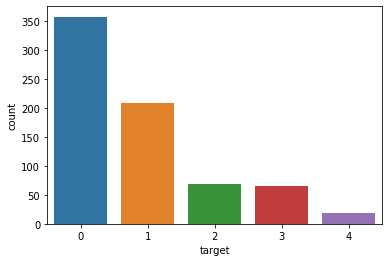

In [15]:
#lets plot the graph to see the same visually.
sns.countplot(x='target',data=total_df)

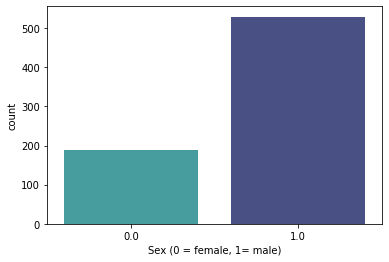

In [16]:
# let us visualize the disease infected with age and sex 
sns.countplot(x='sex', data=total_df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

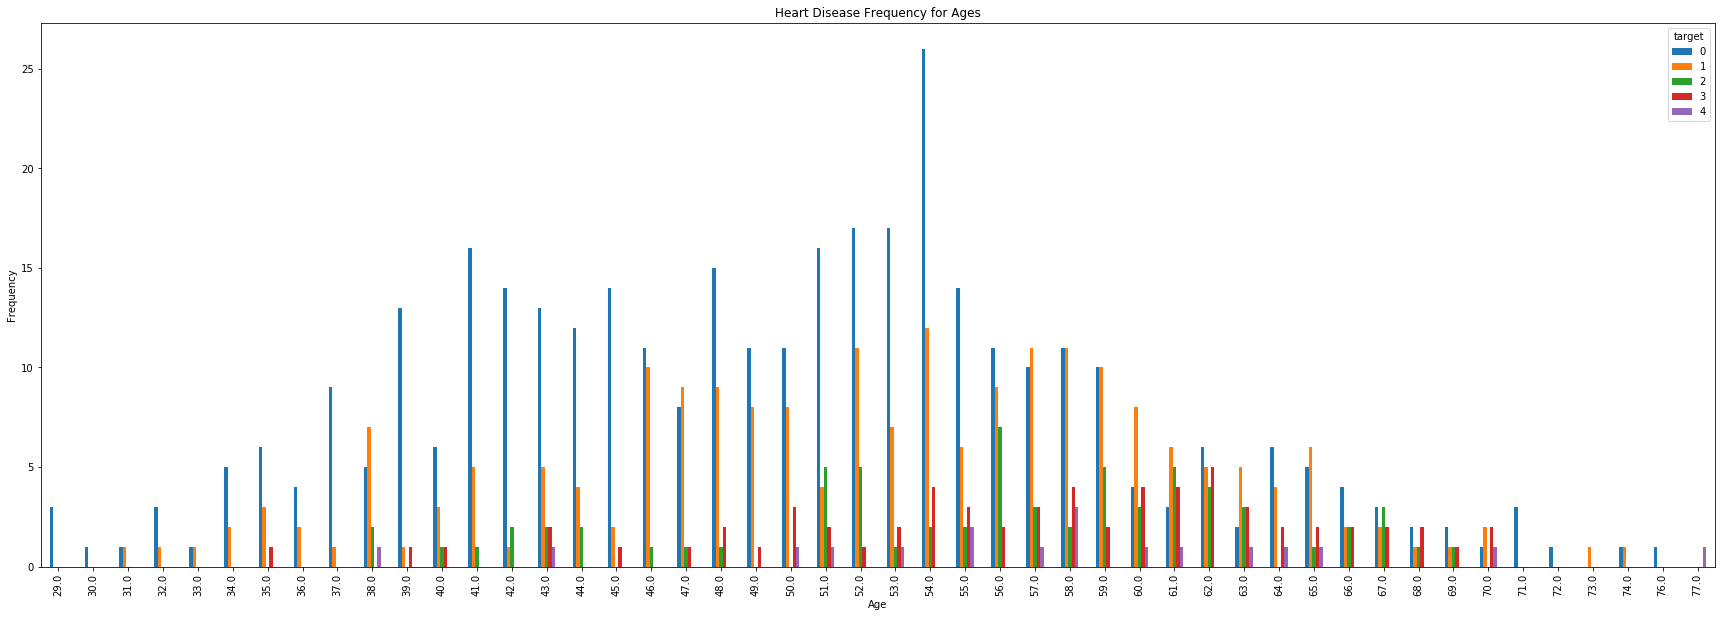

In [19]:
pd.crosstab(total_df.age,total_df.target).plot(kind="bar",figsize=(30,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

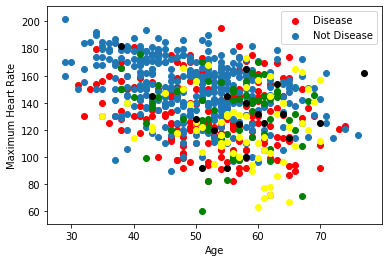

In [24]:
plt.scatter(x=total_df.age[total_df.target==1], y=total_df.thalach[(total_df.target==1)], c="red")
plt.scatter(x=total_df.age[total_df.target==0], y=total_df.thalach[(total_df.target==0)])
plt.scatter(x=total_df.age[total_df.target==2], y=total_df.thalach[(total_df.target==2)], c="green")
plt.scatter(x=total_df.age[total_df.target==3], y=total_df.thalach[(total_df.target==3)], c="yellow")
plt.scatter(x=total_df.age[total_df.target==4], y=total_df.thalach[(total_df.target==4)], c="black")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [32]:
xtrain = total_df.drop(['target'],axis=1)
print("shape of Xtrain:",xtrain.shape)
ytrain = total_df['target']
print("shape of Ytrain:",ytrain.shape)

shape of Xtrain: (717, 13)
shape of Ytrain: (717,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain,test_size = 0.2,random_state=0)

In [38]:
print("shape of Xtrain:",x_train.shape)
print("shape of Xtrain:",x_test.shape)
print("shape of Xtrain:",y_train.shape)
print("shape of Xtrain:",y_test.shape)

shape of Xtrain: (573, 13)
shape of Xtrain: (144, 13)
shape of Xtrain: (573,)
shape of Xtrain: (144,)
